# Read data on regolith cover and thickness extracted from facet simulations, and plot the results

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
filename = 'regolith_analysis20180910.csv'

In [3]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
dist_param = np.zeros(num_lines - 1)  # skip 1 header line
weath_param = np.zeros(num_lines - 1)
reg_cover_proportion = np.zeros(num_lines - 1)
reg_thickness = np.zeros(num_lines - 1)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(','.join(row) + '\n')
        if i >= 1:
            dist_param[i-1] = row[1]
            weath_param[i-1] = row[2]
            reg_cover_proportion[i-1] = row[3]
            reg_thickness[i-1] = row[9]
        i += 1

Run name,Disturbance rate parameter,Weathering rate parameter,Proportion regolith,Proportion rock,Number regolith-air pairs,Number rock-air pairs,Number surface pairs,Total regolith cells,Regolith thickness

d-30w-23,0.001,0.00501187233627,0.643312101911,0.356687898089,101,56,157,51,0.645569620253

d-40w-36,0.0001,0.000251188643151,0.207171314741,0.792828685259,52,199,251,30,0.379746835443

d-40w-31,0.0001,0.000794328234724,0.40782122905,0.59217877095,73,106,179,38,0.481012658228

d-30w-24,0.001,0.00398107170553,0.906832298137,0.0931677018634,146,15,161,73,0.924050632911

d-40w-38,0.0001,0.000158489319246,0.211320754717,0.788679245283,56,209,265,31,0.392405063291

d-30w-12,0.001,0.063095734448,0.987261146497,0.0127388535032,155,2,157,78,0.987341772152

d-30w-15,0.001,0.0316227766017,0.936305732484,0.0636942675159,147,10,157,74,0.936708860759

d-30w-14,0.001,0.0398107170553,0.987261146497,0.0127388535032,155,2,157,78,0.987341772152

d-40w-39,0.0001,0.000125892541179,0.154098360656,0.845

In [4]:
data = {'dprime' : dist_param, 'wprime': weath_param, 'cover': reg_cover_proportion}
df = pd.DataFrame(data)
df = df.sort_values(by=['dprime', 'wprime'])

In [5]:
reg_cover_proportion = df['cover'].values.reshape((4, 31))
weath_param = df['wprime'].values.reshape((4, 31))
dist_param = df['dprime'].values.reshape((4, 31))
weath_param

array([[0.0001    , 0.00012589, 0.00015849, 0.00019953, 0.00025119,
        0.00031623, 0.00039811, 0.00050119, 0.00063096, 0.00079433,
        0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
        0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
        0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
        0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282,
        0.1       ],
       [0.0001    , 0.00012589, 0.00015849, 0.00019953, 0.00025119,
        0.00031623, 0.00039811, 0.00050119, 0.00063096, 0.00079433,
        0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
        0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
        0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
        0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282,
        0.1       ],
       [0.0001    , 0.00012589, 0.00015849, 0.00019953, 0.00025119,
        0.00031623, 0.00039811, 0.00050119, 0.00063096, 0.00079433,
      

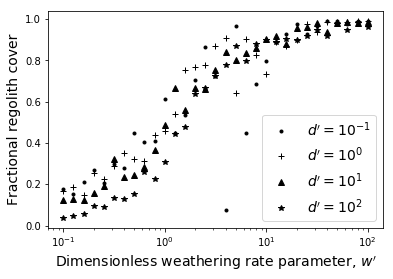

In [6]:
psyms = ['k.', 'k+', 'k^', 'k*']

# Plot the weathering + disturbance runs
for d in range(4):
    plt.semilogx(10.0**3 * weath_param[d,:], reg_cover_proportion[d,:], psyms[d])

# Labels and legend
plt.xlabel(r"Dimensionless weathering rate parameter, $w'$", fontsize=14)
plt.ylabel('Fractional regolith cover', fontsize=14)
plt.legend([r"$d'= 10^{-1}$", r"$d'= 10^0$", r"$d'= 10^1$", r"$d'= 10^2$", r"$d' \rightarrow \infty$", r"$\theta = 60^\circ - 360 w' / \pi$", r"$\theta = 30^\circ$"], fontsize=14)

plt.savefig('reg_cover_vs_wprime.pdf')